In [90]:
import altair as alt
import pandas as pd
import numpy as np
# Data
data = pd.DataFrame({
    'Race': [
        'Asian',
        'Hispanic or Latino',
        'Black or African American',
        'More than one race',
        'Native Hawaiian or Other Pacific Islander',
        'White',
        'American Indian or Alaska Native'
    ],
    'Rate': [6.9, 8.1, 8.9, 10.5, 14.3, 17.6, 27.1]
})
data.loc[:,"Percent"] = np.round(100* data.Rate/data.Rate.sum(), 2)
# Create the base chart
base = alt.Chart(data).encode(
    y=alt.Y('Race:N', sort='-x', axis=alt.Axis(labelLimit=300, title = None, ticks = False, labelColor = 'white', labelFontSize = 12)),
    x=alt.X('Rate:Q', axis = None),
    tooltip=['Race', 'Percent']
)

# Create the bars
bars = base.mark_bar().encode(
    color=alt.value('purple')  # Set the color to match the original chart
)
# Add text labels
text = base.mark_text(
    align='left',
    baseline='middle',
    dx=3 , # Nudge text to right so it doesn't appear on top of the bar
    color = 'white'
).encode(
    text='Rate:Q', # text = 'Percent:N' #O, N, Q, T, G.
)

# Combine the bars and text
chart = (bars + text).properties(
    width=800,
    height=200,
    # title='National Age Adjusted Rate by Race',
)

# Add a vertical line for the national average
national_avg = data.Rate.mean()
vline = alt.Chart(pd.DataFrame({'x': [national_avg]})).mark_rule(strokeDash=[4, 4]).encode(
    x='x',
    color=alt.value('lightgreen')
)

# Add text for the national average line
avg_text = alt.Chart(pd.DataFrame({'x': [national_avg+national_avg/5], 'y': [0.6]})).mark_text(
    text='National age adjusted rate',
    align='center',
    fontSize=10, color = 'lightgreen'
).encode(
    x='x:Q',
    y=alt.value(140)  # Adjust this value to position the text vertically
)

# Combine all elements
final_chart = (chart + vline + avg_text).configure_view(
    strokeWidth=0, stroke=None).configure(
    background='transparent',
    padding={'left': 0, 'top': 0, 'right': 0, 'bottom': 0},
    axis={'grid': False, 'domain': False, 'ticks': False},
    view={'stroke': 'transparent', 'strokeWidth': 0}
)
# Display the chart
final_chart#.save('racial_data_chart.html')


alt.LayerChart(...)

In [88]:
import altair as alt
import pandas as pd

# Sample data
data = pd.DataFrame({
    'Category': ['A', 'B', 'C', 'D', 'E'],
    'Value': [10, 20, 30, 40, 50]
})

# Create horizontal bar chart with transparent background
chart = alt.Chart(data).mark_bar().encode(
    x='Value:Q',
    y='Category:N',
    color='Category:N'
).configure(
    background='transparent',padding={'left': 0, 'top': 0, 'right': 0, 'bottom': 0},
    axis={'grid': False, 'domain': False, 'ticks': False},view={'stroke': 'transparent', 'strokeWidth': 0}
)

# Display the chart
chart

alt.Chart(...)

In [68]:

import altair as alt
import pandas as pd

# Sample data
data = pd.DataFrame({
    'Category': ['A', 'B', 'C', 'D', 'E'],
    'Value': [10, 20, 30, 40, 50]
})

# Create horizontal bar chart with transparent background
chart = alt.Chart(data).mark_bar().encode(
    x='Value:Q',
    y='Category:N',
    color='Category:N'
).configure(
    background='transparent'
)

# Display the chart
chart

alt.Chart(...)

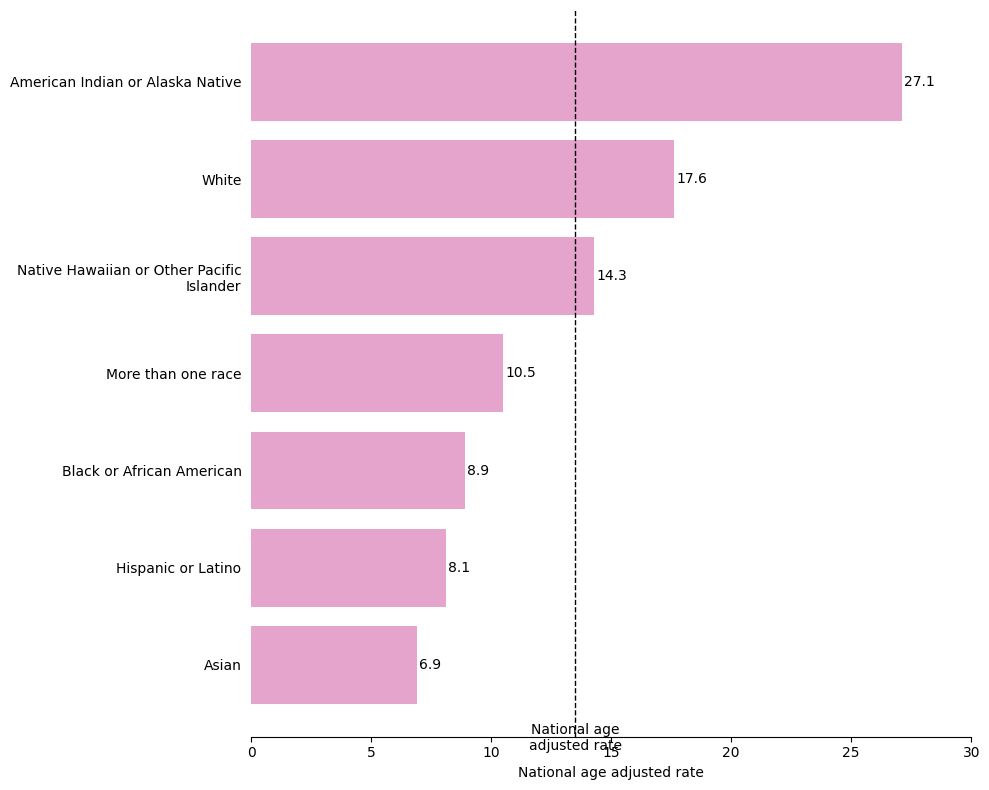

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Data
races = [
    'Asian',
    'Hispanic or Latino',
    'Black or African American',
    'More than one race',
    'Native Hawaiian or Other Pacific\nIslander',
    'White',
    'American Indian or Alaska Native'
]
rates = [6.9, 8.1, 8.9, 10.5, 14.3, 17.6, 27.1]

# Create horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 8))
bars = ax.barh(races, rates, color='#E5A4CB')

# Customize the plot
ax.set_xlabel('National age adjusted rate')
ax.set_xlim(0, 30)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(left=False)

# Add value labels to the end of each bar
for i, v in enumerate(rates):
    ax.text(v + 0.1, i, str(v), va='center')

# Add vertical line for national average
national_avg = 13.5  # Approximated from the image
ax.axvline(x=national_avg, color='black', linestyle='--', linewidth=1)
ax.text(national_avg, -0.6, 'National age\nadjusted rate', ha='center', va='top')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

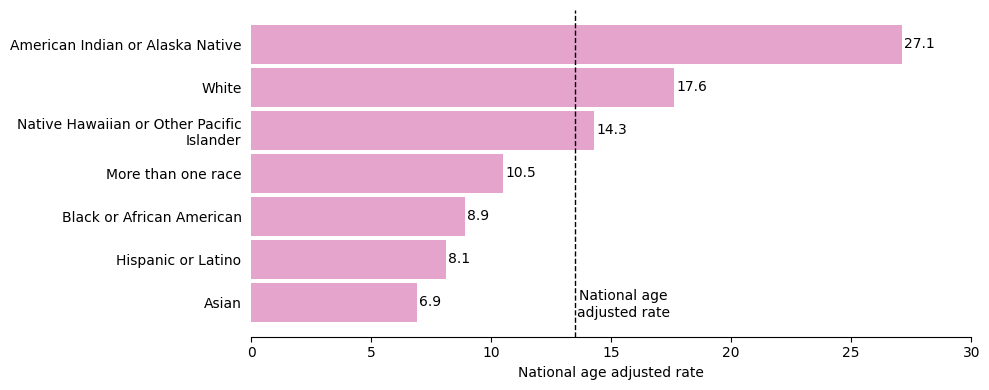

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Data
races = [
    'Asian',
    'Hispanic or Latino',
    'Black or African American',
    'More than one race',
    'Native Hawaiian or Other Pacific\nIslander',
    'White',
    'American Indian or Alaska Native'
]
rates = [6.9, 8.1, 8.9, 10.5, 14.3, 17.6, 27.1]

# Create horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 4))  # Reduced height from 8 to 6
bars = ax.barh(races, rates, color='#E5A4CB', height=.91)  # Added height parameter

# Customize the plot
ax.set_xlabel('National age adjusted rate')
ax.set_xlim(0, 30)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(left=False)

# Add value labels to the end of each bar
for i, v in enumerate(rates):
    ax.text(v + 0.1, i, str(v), va='center')

# Add vertical line for national average
national_avg = 13.5  # Approximated from the image
ax.axvline(x=national_avg, color='black', linestyle='--', linewidth=1)
ax.text(national_avg+2, 0.3, 'National age\nadjusted rate', ha='center', va='top')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [63]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, Label, LabelSet
from bokeh.palettes import Magma256
from bokeh.io import output_notebook
output_notebook()
# Data
races = [
    'Asian',
    'Hispanic or Latino',
    'Black or African American',
    'More than one race',
    'Native Hawaiian or Other Pacific Islander',
    'White',
    'American Indian or Alaska Native'
]
rates = [6.9, 8.1, 8.9, 10.5, 14.3, 17.6, 27.1]

# Create a ColumnDataSource
source = ColumnDataSource(data=dict(
    races=races,
    rates=rates,
    y=list(range(len(races)))
))

# Create the figure
p = figure(y_range=races, width=800, height=400, title="National Age Adjusted Rate by Race",
           toolbar_location=None)

# Add the bars
bars = p.hbar(y='y', right='rates', height=0.7, source=source, 
              line_color='white', fill_color=Magma256[55])

# Customize the plot
p.xgrid.grid_line_color = None
p.y_range.range_padding = .1
p.xaxis.axis_label = 'National age adjusted rate'
p.ygrid.grid_line_color = None
p.yaxis.axis_line_color = None
p.yaxis.major_tick_line_color = None

# Add value labels
labels = LabelSet(x='rates', y='y', text='rates', x_offset=5, y_offset=0, source=source,
               text_font_size="8pt", text_color="red")
p.add_layout(labels)




# Add vertical line for national average'
national_avg = 13.5  # Approximated from the image
vline = p.line([national_avg, national_avg], [-1, len(races)], line_color="lightgreen", line_dash="dashed")

# Add text for national average line
avg_label = Label(x=national_avg+2, y=.5, text="National age\nadjusted rate",
                  text_align="center", text_font_size="8pt")
p.add_layout(avg_label)

# Show the plot
show(p)

Loading BokehJS ...